<a href="https://colab.research.google.com/github/Yuan325/CSCI6364_MachineLearning/blob/main/Project1/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Functions used: 

In [1]:
# knn and distance functions

from math import *

def eu_distance(x1, x2):
  temp = x1-x2
  dist = np.sum(temp*temp, axis=1)
  return np.sqrt(dist)

def man_distance(x1, x2):
  temp = x1-x2
  return np.sum(np.absolute(temp), axis = 1)

def max_norm_distance(x1, x2):
  temp = x1-x2
  return np.amax(np.absolute(temp), axis = 1)

def calculate_distances(test_x, train_x, train_y, dist_metrics):
  dist_list=[]
  if dist_metrics == "euc":
    dist_list = eu_distance(test_x, train_x)
  elif dist_metrics == "manh":
    dist_list = man_distance(test_x, train_x)
  elif dist_metrics == "max_n":
    dist_list = max_norm_distance(test_x, train_x)
  else:
    print("Wrong distance metrics provided")
    return
  # Sort the list in descending order
  order = np.argsort(dist_list)
  dist_sort = dist_list[order]
  nearest_y = train_y[order]
  return nearest_y

def knn(nearest_y, k):
  count={}
  for i in range(0, k):
    c = nearest_y[i]
    count[c] = count[c] + 1 if c in count else 1
  max_count = 0
  for k, v in count.items():
    if v > max_count:
      max_class = k
      max_count = v
  return max_class
  

In [2]:
# evaluation functions

def confusionMatrix(y, yhat, n):
  mat = np.zeros((n, n))
  for y_val, yhat_val in zip(y, yhat):
    mat[y_val][yhat_val] += 1
  print(mat)
  return mat

def confusionValues(mat, index):
  tn = fp = fn = tp = 0
  tp = mat[index][index]
  for i in range(len(mat)): # truth value
    for j in range(len(mat)): #prediction value
      if i == index and j != index:
        fn += mat[i][j]
      elif i != index and j == index:
        fp += mat[i][j]
      elif i != index and j!= index:
        tn += mat[i][j]
  return tn, fp, fn, tp

def accuracy(tn, fp, fn, tp):
  return (tp + tn)/(tp+tn+fp+fn)

def sensitivity(tn, fp, fn, tp):
  return tp/(tp+fn)

def specificity(tn, fp, fn, tp):
  return tn/(tn+fp)

def pos_pred_val(tn, fp, fn, tp):
  return tp/(tp+fp)

def false_positive_rate(tn, fp, fn, tp):
  return fp/(tn+fp)

def runEval(y, yhat, n, index):
  mat = confusionMatrix(y, yhat, n)
  tn, fp, fn, tp = confusionValues(mat, index)
  print("TN: ", tn, "\tFP: ", fp, "\nFN: ", fn, "\tTP: ", tp)
  print("Accuracy: ", accuracy(tn, fp, fn, tp))
  print("Sensitivity: ", sensitivity(tn, fp, fn, tp))
  print("Specificity: ", specificity(tn, fp, fn, tp))
  print("Positive Predictive Value: ", pos_pred_val(tn, fp, fn, tp))
  print("False Positive Rate: ", false_positive_rate(tn, fp, fn, tp))

In [10]:
# imputation functions
# plot functions

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

def getMean(x):
  total = 0
  count = 0
  for val in x:
    if val != 0:
      total += val
      count += 1
  return total/count

def replaceZeros(x):
  mean = getMean(x)
  count = 0
  for i in range(len(x)):
    if x[i] == 0:
      x[i] = mean
      count += 1
  return x, count

def printHistogram(x, name = "Data"):
  q25, q75 = np.percentile(x,[25,75])
  bin_width = 2*(q75 - q25)*len(x)**(-1/3)
  bins = round((np.amax(x) - np.amin(x))/bin_width)
  print("Freedman–Diaconis number of bins:", bins)

  plt.style.use('seaborn-whitegrid')
  plt.hist(x, density = True, bins = bins, label=name) # density false make counts, true make probability
  mn, mx = plt.xlim()
  plt.xlim(mn, mx)
  kde_xs = np.linspace(mn, mx, 1000)
  kde = st.gaussian_kde(x)
  plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
  plt.legend(loc="upper right")
  plt.ylabel('Probability')
  plt.xlabel(name)
  plt.title("Histogram")
  plt.show()

def printScatterplot(x1, x2, name1="Data 1", name2 = "Data 2"):
  plt.style.use('seaborn-whitegrid')
  plt.plot(x1, x2, 'o')
  plt.xlabel(name1)
  plt.ylabel(name2)
  plt.show()

def printScatterWithClass(x1, x2, y, name1="Data 1", name2="Data2"):
  x1_class1 = []
  x1_class2 = []
  x2_class1 = []
  x2_class2 = []
  for i in range(len(y)):
    if y[i] == 0:
      x1_class1.append(x1[i])
      x2_class1.append(x2[i])
    else:
      x1_class2.append(x1[i])
      x2_class2.append(x2[i])
  plt.style.use('seaborn-whitegrid')
  plt.scatter(x1_class1, x2_class1, c = 'b', marker="o", label="Class 0")
  plt.scatter(x1_class2, x2_class2, c = 'r', marker="o", label="Class 1")
  plt.legend(loc="upper left")
  plt.xlabel(name1)
  plt.ylabel(name2)
  plt.show()

In [3]:
import time

def runKNN(train_x, train_y, test_x, test_y, k_list, dist_metrics = "euc"):
  start = time.time()
  pred = []
  for test, y in zip(test_x, test_y):
    nearest_y = calculate_distances(test, train_x, train_y, dist_metrics)
    temp = []
    temp.append(y)
    for k in k_list:
      yhat = knn(nearest_y, k)
      temp.append(yhat)
    pred.append(temp)
  end = time.time()
  total_time = end-start
  return total_time, pred

Digit Recognizer
https://www.kaggle.com/c/digit-recognizer/data

In [4]:
!pip install kaggle

In [ ]:
from google.colab import files

files.upload() #upload json API key from Kaggle

In [6]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
!kaggle competitions download -c digit-recognizer
!unzip train.csv.zip

test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [24]:
import csv
import numpy as np
from google.colab.patches import cv2_imshow

def printSample(train_x, train_y):
  ro = np.zeros((28, 28, 3))
  for n in range(10):
    for index in range(len(train_y)):
      if n == train_y[index]:
        for i in range(0, 27):
          for j in range(0, 27):
            ro[i,j,0] = train_x[index, j+i*28]
            ro[i,j,1] = train_x[index, j+i*28]
            ro[i,j,2] = train_x[index, j+i*28]
        cv2_imshow(ro)
        print()
        break

reader = csv.reader(open('/content/train.csv', 'r'))
header = next(reader)
data=[]
for row in reader: 
  data.append(row)
data = np.array(data)
data = data.astype(np.float)
np.random.shuffle(data)
data_x = data[:, 1:]
data_y = data[:, 0]
# total of 42000 dataset
split = 33600 #80/20 split
train_x = data_x[:split]
train_y = data_y[:split].astype(np.int)
test_x = data_x[split:]
test_y = data_y[split:].astype(np.int)
printSample(train_x, train_y)

In [25]:
k_list = [1, 10, 50, 100, 1000, 3000]
total_time, pred = runKNN(train_x, train_y, test_x, test_y, k_list, "euc")
print("Time to run K-NN with given Ks: ", total_time)
print()
pred = np.array(pred)
for k in range(len(k_list)):
  print("With k: ", k_list[k])
  runEval(pred[:, 0], pred[:, k+1], 10, 5)
  print()

Time to run K-NN with given Ks:  934.1573383808136

With k:  1
[[862.   0.   1.   0.   0.   1.   4.   1.   0.   1.]
 [  0. 944.   3.   0.   2.   0.   0.   1.   0.   0.]
 [  2.   6. 789.   6.   0.   0.   0.  12.   5.   1.]
 [  1.   0.   6. 838.   0.  18.   1.   2.  10.   4.]
 [  2.   3.   0.   0. 821.   0.   4.   3.   0.  20.]
 [  1.   2.   0.  20.   1. 696.   4.   0.   4.   5.]
 [  6.   5.   0.   1.   1.  10. 787.   0.   1.   0.]
 [  0.   9.   3.   0.   4.   0.   0. 867.   0.  13.]
 [  1.   7.   1.  17.   1.  10.   1.   2. 743.   6.]
 [  1.   3.   1.   3.  11.   2.   1.  15.   0. 760.]]
TN:  7626.0 	FP:  41.0 
FN:  37.0 	TP:  696.0
Accuracy:  0.9907142857142858
Sensitivity:  0.9495225102319236
Specificity:  0.9946524064171123
Positive Predictive Value:  0.9443690637720489
False Positive Rate:  0.0053475935828877

With k:  10
[[863.   0.   0.   0.   0.   1.   6.   0.   0.   0.]
 [  0. 942.   3.   0.   1.   0.   2.   1.   0.   1.]
 [  4.  14. 779.   5.   1.   0.   1.  15.   1.   1.]
 [  

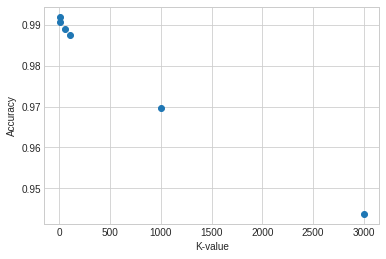

In [27]:
k = [1, 10, 50, 100, 1000, 3000]
acc = [0.990714285714286, 0.99202380952381, 0.988928571428571, 0.987619047619048, 0.969642857142857, 0.9435714285714286]
printScatterplot(k, acc, "K-value", "Accuracy")

Pima Indians Diabetes Database
https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [ ]:
from google.colab import files

files.upload() #upload csv dataset

In [15]:
import csv
import numpy as np

reader = csv.reader(open('/content/diabetes.csv', 'r'))
header = next(reader)
data=[]
for row in reader: 
  data.append(row)
data = np.array(data)
data = data.astype(np.float)
np.random.shuffle(data)
# 768 dataset
split = 691 #90/10 split
train_data = data[:split]
test_data = data[split:]
train_x = train_data[:, :-1]
train_y = train_data[:, -1].astype(np.int)
test_x = test_data[:, :-1]
test_y = test_data[:, -1].astype(np.int)

# imputation
for i in range(1, len(train_x[0])):
  train_data[:, i], replaced = replaceZeros(train_data[:,i])
  print("replaced ", replaced, " values for feature index ", i)

# normalization
min = []
max = []
for i in range(len(train_x[0])):
  min.append(np.amin(train_x[:,i]))
  max.append(np.amax(train_x[:,i]))

for i in range(len(min)):
  train_x[:,i]=(train_x[:,i] - min[i]) / (max[i]-min[i])
  test_x[:,i]=(test_x[:,i] - min[i]) / (max[i]-min[i])

replaced  5  values for feature index  1
replaced  32  values for feature index  2
replaced  205  values for feature index  3
replaced  333  values for feature index  4
replaced  11  values for feature index  5
replaced  0  values for feature index  6
replaced  0  values for feature index  7


Freedman–Diaconis number of bins: 15


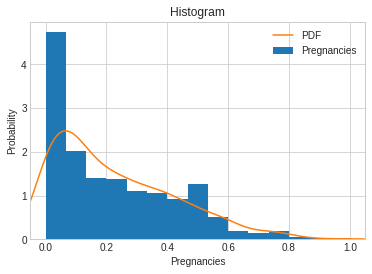

Freedman–Diaconis number of bins: 16


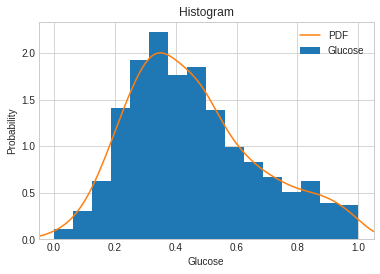

Freedman–Diaconis number of bins: 27


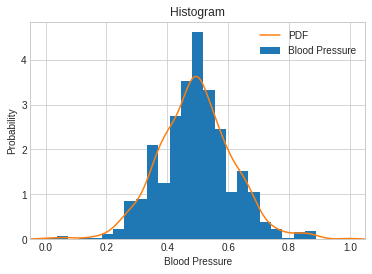

Freedman–Diaconis number of bins: 58


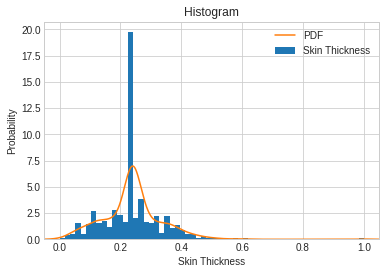

Freedman–Diaconis number of bins: 106


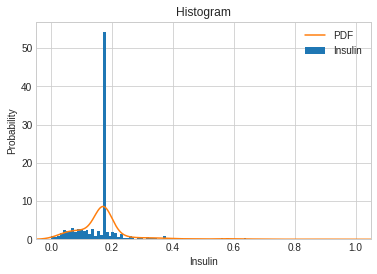

Freedman–Diaconis number of bins: 24


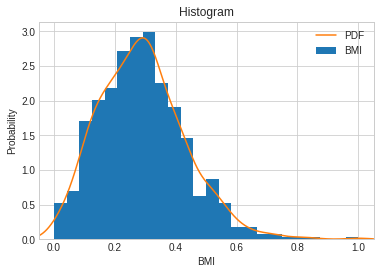

Freedman–Diaconis number of bins: 28


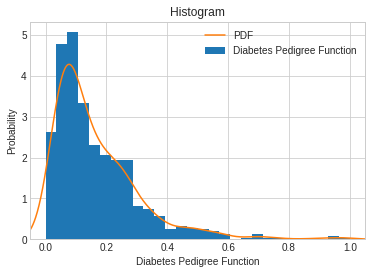

Freedman–Diaconis number of bins: 16


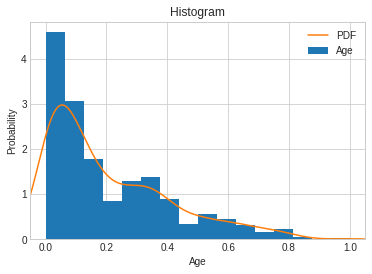

In [ ]:
printHistogram(train_x[:,0], "Pregnancies")
printHistogram(train_x[:,1], "Glucose")
printHistogram(train_x[:,2], "Blood Pressure")
printHistogram(train_x[:,3], "Skin Thickness")
printHistogram(train_x[:,4], "Insulin")
printHistogram(train_x[:,5], "BMI")
printHistogram(train_x[:,6], "Diabetes Pedigree Function")
printHistogram(train_x[:,7], "Age")

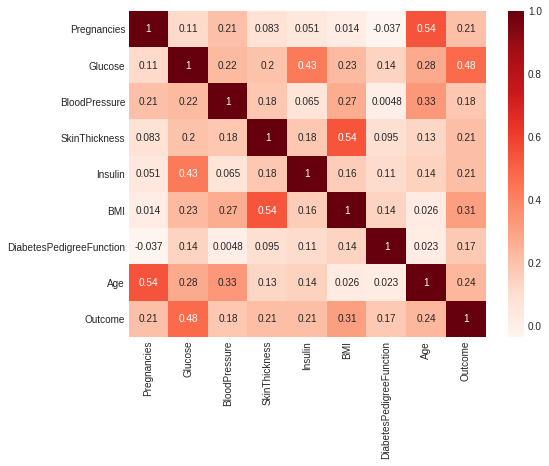

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# heatmap for Pearson Correlation for training data
df = pd.DataFrame(train_data, columns = header)
plt.figure(figsize=(8, 6))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

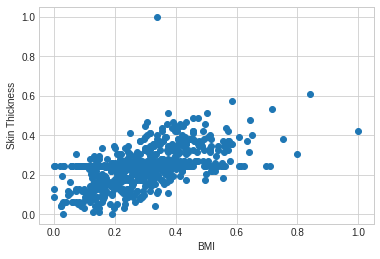

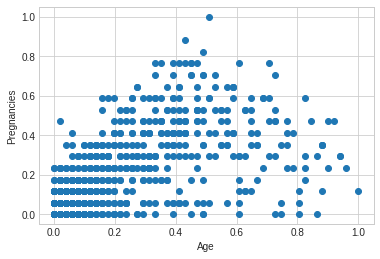

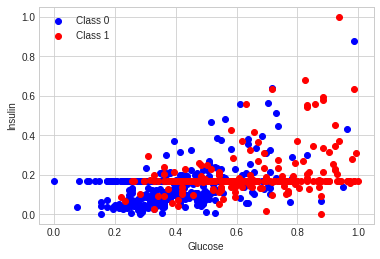

In [17]:
printScatterplot(train_x[:,5], train_x[:,3], "BMI", "Skin Thickness")
printScatterplot(train_x[:,7], train_x[:,0], "Age", "Pregnancies")
printScatterWithClass(train_x[:,1], train_x[:,4], train_y, "Glucose", "Insulin")

In [18]:
# remove 'skin thickness'
train_x = np.delete(train_x, 3, 1)
test_x = np.delete(test_x, 3, 1)
min = np.delete(min, 3, 0)
max = np.delete(max, 3, 0)

# remove 'pregnancy' 
train_x = np.delete(train_x, 0, 1)
test_x = np.delete(test_x, 0, 1)
min = np.delete(min, 0, 0)
max = np.delete(max, 0, 0)

In [23]:
k_list = [1, 20, 50, 100, 200]
total_time_euc, pred_euc = runKNN(train_x, train_y, test_x, test_y, k_list, 'euc')
print("Time to run K-NN (Euclidean Distance Metrics) with given Ks: ", total_time_euc)
print()
total_time_man, pred_man = runKNN(train_x, train_y, test_x, test_y, k_list, 'manh')
print("Time to run K-NN (Manhattan Distance Metrics) with given Ks: ", total_time_man)
print()
total_time_max, pred_max = runKNN(train_x, train_y, test_x, test_y, k_list, 'max_n')
print("Time to run K-NN (Max Norm Distance Metrics) with given Ks: ", total_time_max)
print()
pred_euc = np.array(pred_euc)
pred_man = np.array(pred_man)
pred_max = np.array(pred_max)

for k in range(len(k_list)):
  print("With k: ", k_list[k])
  runEval(pred_euc[:, 0], pred_euc[:, k+1], 2, 1)
  print()

for k in range(len(k_list)):
  print("With k: ", k_list[k])
  runEval(pred_man[:, 0], pred_man[:, k+1], 2, 1)
  print()

for k in range(len(k_list)):
  print("With k: ", k_list[k])
  runEval(pred_max[:, 0], pred_max[:, k+1], 2, 1)
  print()

Time to run K-NN (Euclidean Distance Metrics) with given Ks:  0.01841568946838379

Time to run K-NN (Manhattan Distance Metrics) with given Ks:  0.014376401901245117

Time to run K-NN (Max Norm Distance Metrics) with given Ks:  0.01612710952758789

With k:  1
[[44.  9.]
 [14. 10.]]
TN:  44.0 	FP:  9.0 
FN:  14.0 	TP:  10.0
Accuracy:  0.7012987012987013
Sensitivity:  0.4166666666666667
Specificity:  0.8301886792452831
Positive Predictive Value:  0.5263157894736842
False Positive Rate:  0.16981132075471697

With k:  20
[[50.  3.]
 [ 7. 17.]]
TN:  50.0 	FP:  3.0 
FN:  7.0 	TP:  17.0
Accuracy:  0.8701298701298701
Sensitivity:  0.7083333333333334
Specificity:  0.9433962264150944
Positive Predictive Value:  0.85
False Positive Rate:  0.05660377358490566

With k:  50
[[51.  2.]
 [ 7. 17.]]
TN:  51.0 	FP:  2.0 
FN:  7.0 	TP:  17.0
Accuracy:  0.8831168831168831
Sensitivity:  0.7083333333333334
Specificity:  0.9622641509433962
Positive Predictive Value:  0.8947368421052632
False Positive Rate:  

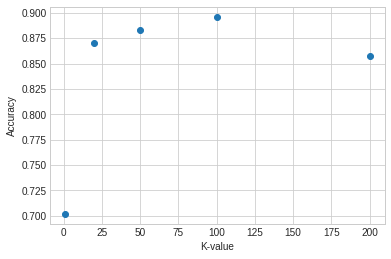

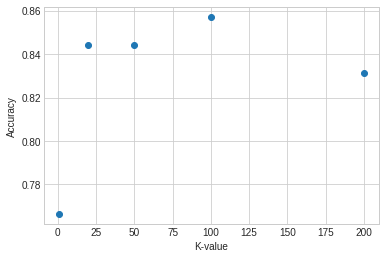

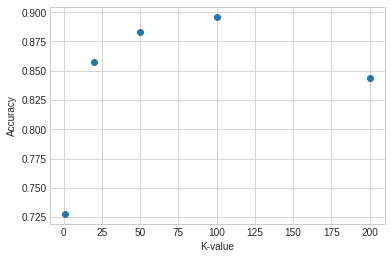

In [26]:
k = [1, 20, 50, 100, 200]
acc = [0.701298701298701, 0.87012987012987, 0.883116883116883, 0.896103896103896, 0.857142857142857]
printScatterplot(k, acc, "K-value", "Accuracy")

k = [1, 20, 50, 100, 200]
acc = [0.766233766233766, 0.844155844155844, 0.844155844155844, 0.857142857142857, 0.831168831168831]
printScatterplot(k, acc, "K-value", "Accuracy")

k = [1, 20, 50, 100, 200]
acc = [0.727272727272727, 0.857142857142857, 0.883116883116883, 0.896103896103896, 0.844155844155844]
printScatterplot(k, acc, "K-value", "Accuracy")